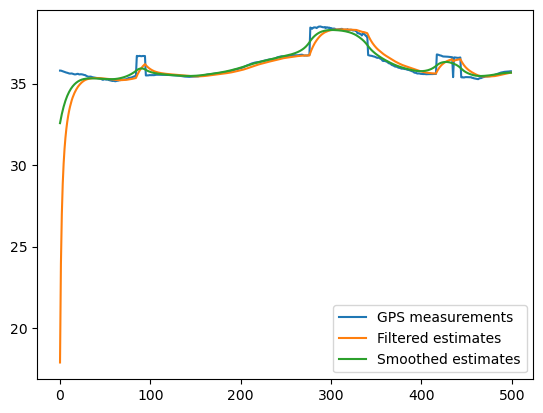

In [4]:
from utils import read_keyframe_trajectory
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
import numpy as np


keyframes = read_keyframe_trajectory("KeyframeTrajectory.txt", "GPSTrajectory.txt")[1:]


# Set up the Kalman filter
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=0,
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.01)


# Generate some random GPS elevation measurements
gps_measurements = np.array([kf.gps.alt for kf in keyframes])

# Create the observation and measurement noise arrays
observation_matrix = np.reshape(gps_measurements, (len(gps_measurements), 1))
measurement_noise = np.ones_like(observation_matrix)

# Run the Kalman filter
filtered_state_means, filtered_state_covariances = kf.filter(observation_matrix)

# Get the smoothed estimates
smoothed_state_means, smoothed_state_covariances = kf.smooth(observation_matrix)


# Plot the original GPS measurements, the filtered estimates, and the smoothed estimates
plt.plot(gps_measurements, label='GPS measurements')
plt.plot(filtered_state_means, label='Filtered estimates')
plt.plot(smoothed_state_means, label='Smoothed estimates')
plt.legend()
plt.show()




# # Generate some random timestamps, latitude, longitude, and GPS elevation measurements
# timestamps = np.array([kf.timestamp for kf in keyframes])
# latitude = np.array([kf.gps.lat for kf in keyframes])
# longitude = np.array([kf.gps.lon for kf in keyframes])
# gps_measurements = np.array([kf.gps.alt for kf in keyframes])

# # Create the observation and measurement noise arrays
# observation_matrix = np.column_stack((timestamps, latitude, longitude, gps_measurements))
# measurement_noise = np.ones_like(observation_matrix)


# # Set up the Kalman filter
# kf = KalmanFilter(transition_matrices=[[1, 0, 0, 1],
#                                        [0, 1, 0, 0],
#                                        [0, 0, 1, 0],
#                                        [0, 0, 0, 1]],
#                   observation_matrices=np.identity(4),  # observation matrix with shape (n, 4)
#                   initial_state_mean=[0, 0, 0, 0],
#                   initial_state_covariance=np.eye(4),
#                   observation_covariance=np.eye(4) * 0.01,  # observation covariance matrix with shape (4, 4)
#                   transition_covariance=np.eye(4) * 0.01)



# # Run the Kalman filter
# filtered_state_means, filtered_state_covariances = kf.filter(observation_matrix)

# # Get the smoothed estimates
# smoothed_state_means, smoothed_state_covariances = kf.smooth(observation_matrix)

# # Plot the original GPS measurements, the filtered estimates, and the smoothed estimates
# plt.plot(timestamps, gps_measurements, label='GPS measurements')
# plt.plot(timestamps, filtered_state_means[:, 0], label='Filtered estimates')
# plt.plot(timestamps, smoothed_state_means[:, 0], label='Smoothed estimates')
# plt.legend()
# plt.show()
